In [5]:
import pandas as pd
import os
import pathlib as path


In [15]:
df = pd.read_csv('D:/python/startup-dashboard/NoteBook/startup_funding_cleaned.csv',index_col='Sr No')

In [16]:
df

,date,startup,vertical,SubVertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000


In [23]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [28]:
df[df['investors'].str.contains('AECAL')].head(5)[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
2814,2015-06-04,InstaLively,Video Streaming,New Delhi,Seed Funding,0.99


In [30]:
df[df['investors'].str.contains('AECAL')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
InstaLively    0.99
Name: amount, dtype: float64

In [35]:
df[df['investors'].str.contains('AECAL')].groupby('vertical')['amount'].sum()

vertical
Video Streaming    0.99
Name: amount, dtype: float64

In [36]:
df[df['investors'].str.contains('AECAL')].groupby('round')['amount'].sum().sort_values(ascending=False)

round
Seed Funding    0.99
Name: amount, dtype: float64

In [ ]:
df[df['investors'].str.contains('AECAL')].groupby('city')['amount'].sum().sort_values(ascending=False)


city
New Delhi    0.99
Name: amount, dtype: float64

In [41]:
df['year'] = df['date'].str[:4]

In [42]:
df

,date,startup,vertical,SubVertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020
...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015


<Axes: xlabel='year'>

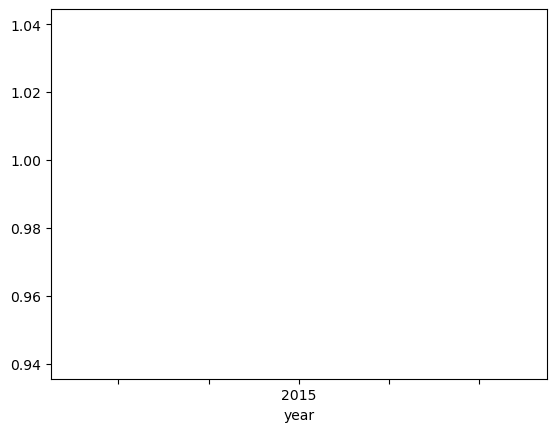

In [50]:
df[df['investors'].str.contains('AECAL')].groupby('year')['amount'].sum().plot()